In [1]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

np.random.seed(42)

In [2]:
df = pd.read_csv('./GSE150150_raw_counts.csv')

# Preprocessing Data
3 versions to work with: `raw_counts`, `scaled_data`, `log_array`. Using log10 here, but any could work.

In [3]:
sampleDf = df

# X is shape of np.array([[1, 2], [2, 3], [1, 3], [10, 1], [9, 3], [11, 3]])
# Getting gene counts across all samples
X = sampleDf.iloc[:,1:].values
X = np.transpose(X)

In [4]:
from sklearn.preprocessing import StandardScaler

raw_counts = X
scaled_data = StandardScaler().fit_transform(raw_counts)

In [5]:
raw_counts.shape

(5376, 24582)

In [6]:
raw_counts[0]

array([3683, 1972,  422, ...,    0,    0,    0], dtype=int64)

In [44]:
np.log10(raw_counts[0], where=raw_counts[0] > 0)

array([3.56620172, 3.29490691, 2.62531245, ..., 0.        , 0.        ,
       0.        ])

In [7]:
log_data = np.log10(raw_counts, where= raw_counts>0)

In [8]:
log_data[0]

array([3.56620172, 3.29490691, 2.62531245, ..., 0.        , 0.        ,
       0.        ])

In [9]:
log_array = np.array(log_data)

In [10]:
log_array[0]

array([3.56620172, 3.29490691, 2.62531245, ..., 0.        , 0.        ,
       0.        ])

In [11]:
np.isfinite(log_array).all()

True

# t-SNE

In [21]:
tsne = TSNE(n_components=2, perplexity = 10, random_state=0, learning_rate='auto', init='pca')
raw_tsne = tsne.fit_transform(raw_counts)

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [22]:
scaled_tsne = tsne.fit_transform(scaled_data)

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [27]:
log_tsne = tsne.fit_transform(log_array)

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Text(0.5, 1.0, 't-SNE for Raw Counts')

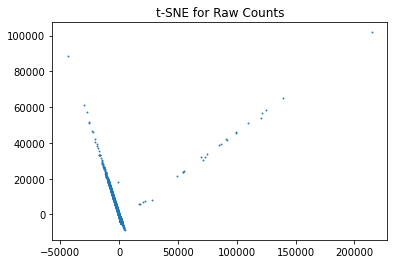

In [26]:
plt.scatter(raw_tsne[:, 0], raw_tsne[:, 1], s=0.75)
plt.title("t-SNE for Raw Counts")

Text(0.5, 1.0, 't-SNE for Scaled Data')

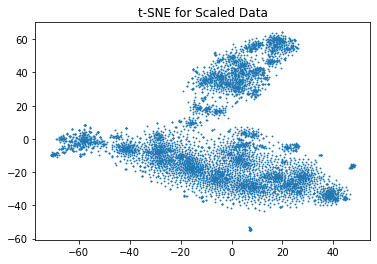

In [28]:
plt.scatter(scaled_tsne[:, 0], scaled_tsne[:, 1], s=0.75)
plt.title("t-SNE for Scaled Data")

Text(0.5, 1.0, 't-SNE for Log Transformation')

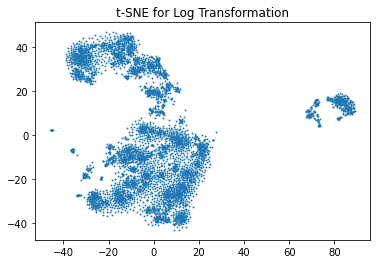

In [29]:
plt.scatter(log_tsne[:, 0], log_tsne[:, 1], s=0.75)
plt.title("t-SNE for Log Transformation")

# UMAP

In [44]:
raw_umap = umap.UMAP(random_state=42).fit_transform(raw_counts)

Text(0.5, 1.0, 'UMAP for Raw Counts')

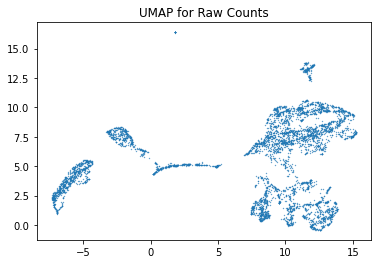

In [45]:
plt.scatter(raw_umap[:, 0], raw_umap[:, 1], s=0.1)
plt.title("UMAP for Raw Counts")

In [46]:
scaled_umap = umap.UMAP(random_state=42).fit_transform(scaled_data)

Text(0.5, 1.0, 'UMAP for Scaled Data')

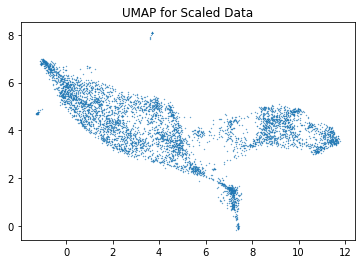

In [47]:
plt.scatter(scaled_umap[:, 0], scaled_umap[:, 1], s=0.1)
plt.title("UMAP for Scaled Data")

In [48]:
log_umap = umap.UMAP(random_state=42).fit_transform(log_array)

Text(0.5, 1.0, 'UMAP for Log Transformation')

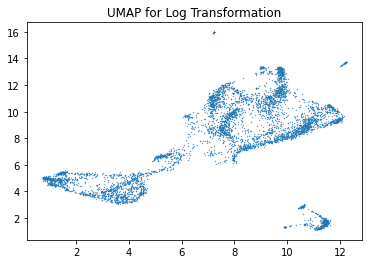

In [49]:
plt.scatter(log_umap[:, 0], log_umap[:, 1], s=0.1)
plt.title("UMAP for Log Transformation")

# DBScan

code modified from: https://www.reneshbedre.com/blog/dbscan-python.html

In [128]:
dbscan_df = pd.DataFrame(raw_umap, columns = ['axis-1', 'axis-2'])
dbscan_df

,axis-1,axis-2
0,-6.014234,3.516432
1,-4.345668,5.190105
2,-6.036997,3.634336
3,-4.619719,5.290567
4,-6.203357,3.151135
...,...,...
5371,-2.665190,7.315392
5372,-6.594500,1.623380
5373,-2.388408,8.280961
5374,-2.806539,7.498226


In [129]:
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 5).fit(dbscan_df)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(dbscan_df)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

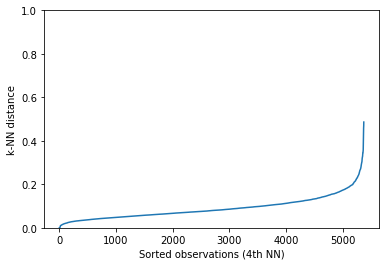

In [132]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.ylim([0, 1])
plt.show()

In [144]:
clusters = DBSCAN(eps = 0.3, min_samples = 4).fit(dbscan_df)
# get cluster labels
set(clusters.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6}

In [145]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 766, 1: 402, 2: 2313, 3: 324, -1: 7, 4: 1381, 5: 165, 6: 18})

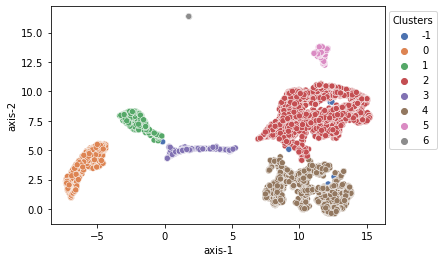

In [146]:
p = sns.scatterplot(data = dbscan_df, x = "axis-1", y = "axis-2", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()